In [ ]:
import pandas as pd

#Loading dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/new_df.csv")

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Dataset Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    int64  
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(4), int64(4), object(6)
memory usage: 102.5+ KB


#Dataset Shape and summary

In [ ]:
df.shape

(920, 16)

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for outliers or unusual values in numerical columns
# This could be as simple as checking basic statistics or using visualizations
print(df.describe())


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   460.500000   53.510870  131.995652  246.650000  137.692391    0.853261   
std    265.725422    9.424685   18.451300   51.697342   25.145235    1.058049   
min      1.000000   28.000000    0.000000   85.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  217.750000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  246.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  267.000000  156.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
c

Inspecting labels of target variable

In [ ]:
num_df = df['num'].value_counts()
pd.DataFrame(num_df)

,count
num,
0,411
1,265
2,109
3,107
4,28


#Data Preprocessing

In [ ]:
# Plotting the histogram and boxplot to check the data distribution for the numerical columns
def plot_histogram_and_boxplot(df, numerical_cols, cyan_palette=["#9468F8"]):
    # Set to "dark" for a black background
    #sns.set(style="dark", palette="deep")
    shade = "#0000ff"
    # Set the figure size to accommodate the subplots
    plt.figure(figsize=(15, len(numerical_cols) * 5))

    # Loop through each numerical column and create a row with a histogram and a boxplot
    for i, col in enumerate(numerical_cols):
        # Histogram (left)
        ax1 = plt.subplot(len(numerical_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        ax1.set_facecolor('#ffffff')

        # Boxplot (right)
        ax2 = plt.subplot(len(numerical_cols), 2, 2*i + 2)
        sns.boxplot(x=df[col], color=cyan_palette[0], linewidth=1.5,medianprops={'color': 'white', 'linewidth': 2},
                    flierprops=dict(markerfacecolor=shade, marker='o', markeredgecolor=shade, markersize=5),
                    whiskerprops=dict(color=shade, linewidth=2.0),
                    capprops=dict(color=shade, linewidth=2.0),
                    boxprops=dict(edgecolor=shade, linewidth=2.0)),

        plt.title(f'Boxplot of {col}')
        ax2.set_facecolor('#ffffff')

    # Adjust layout for better readability and display the plot
    plt.tight_layout()
    plt.show()

In [ ]:
categorical_cols = ['sex','exang','cp','fbs','restecg','slope','thal','ca']
numerical_cols = ["id", "age","trestbps","chol","thalch", "oldpeak"]
target_col = ["num"]
print("The categorical cols are : ", categorical_cols)
print("The numerical cols are : ", numerical_cols)
print("The target variable is :  ", target_col)

The categorical cols are :  ['sex', 'exang', 'cp', 'fbs', 'restecg', 'slope', 'thal', 'ca']
The numerical cols are :  ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak']
The target variable is :   ['num']


In [ ]:
df.oldpeak.describe()

count    920.000000
mean       0.853261
std        1.058049
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

Dealing with Outliers
The use of the Interquartile Range (IQR) method for outlier removal is a standard statistical practice aimed at mitigating the impact of extreme values in a dataset, which can distort analyses, especially under the assumption of normal data distribution. This method calculates the IQR as the difference between the 25th (Q1) and 75th (Q3) percentiles of the data, identifying outliers as values outside 1.5 times the IQR from Q1 and Q3.

In the context of heart disease prediction, while the IQR method is applied to clean the data, cholesterol levels ('chol') are deliberately excluded from this outlier removal process. This exception is made due to the clinical importance of cholesterol levels as a significant risk factor for heart disease. Unlike typical outliers, extreme cholesterol values may carry vital information about individual risks for heart disease. Removing these values could eliminate critical data, reducing the predictive model's effectiveness and clinical relevance.

In [ ]:
skewness = df['oldpeak'].skew()
print("Skewness of oldpeak:", skewness)


Skewness of oldpeak: 1.1347025952263665


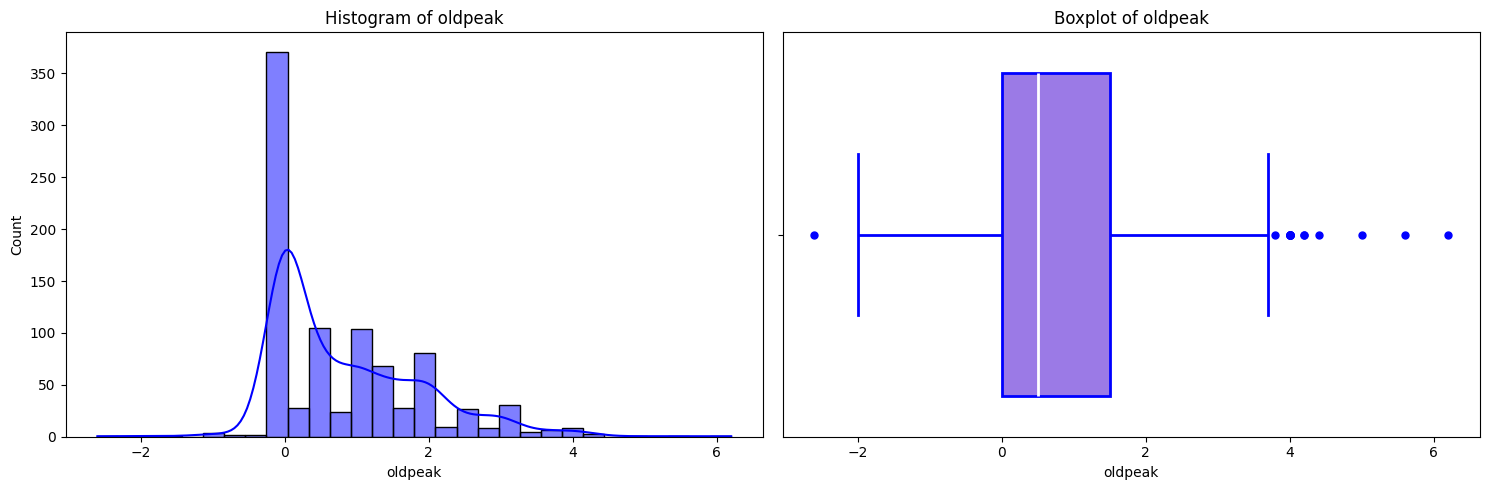

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plot_histogram_and_boxplot(df, ['oldpeak'])

Given that the skewness of the oldpeak distribution is approximately 1.1347, this indicates that the distribution is positively skewed, or right-skewed.This typically implies that there are a significant number of outlier values on the higher end of the oldpeak range, which could potentially influence any analysis or statistical modeling using this data. This would be addressed skewness by categorizing 'Oldpeak' via Binning to mitigate its skewed distributions.This approach not only simplifies the variable by grouping continuous data into discrete intervals, but also helps to minimize the influence of outliers and extreme values that can distort model training and statistical analysis.

<ipython-input-18-5d53b3874c0c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='oldpeak_binned', data=df, palette='viridis')  # Adjust the palette as needed


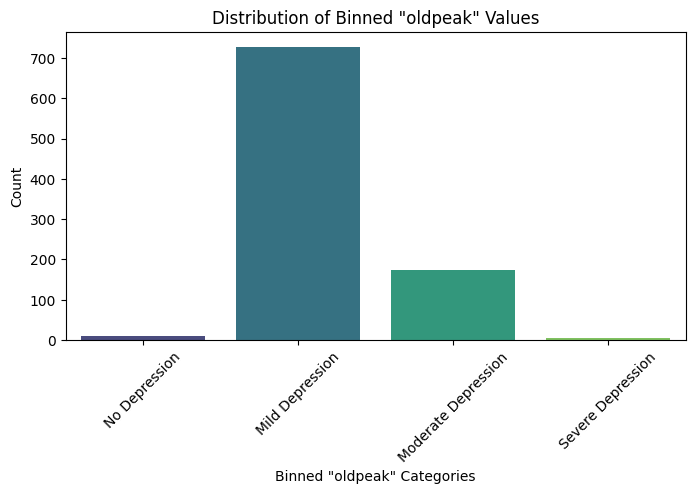

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it already contains the 'oldpeak' column

# Define the number of bins
number_of_bins = 4

# Calculate the range of the data (max - min)
max_oldpeak = df['oldpeak'].max()
min_oldpeak = df['oldpeak'].min()
data_range = max_oldpeak - min_oldpeak

# Calculate the bin width
bin_width = data_range / number_of_bins

# Generate the bin edges
bin_edges = [min_oldpeak + i * bin_width for i in range(number_of_bins + 1)]

# Define labels for the bins.
bin_labels = ['No Depression', 'Mild Depression', 'Moderate Depression', 'Severe Depression']

# Bin the 'oldpeak' data and create a new column for the binned data
df['oldpeak_binned'] = pd.cut(df['oldpeak'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Plot the distribution of the binned data.
plt.figure(figsize=(8, 4))
sns.countplot(x='oldpeak_binned', data=df, palette='viridis')  # Adjust the palette as needed

plt.title('Distribution of Binned "oldpeak" Values')
plt.xlabel('Binned "oldpeak" Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()



In [ ]:
df['oldpeak'] = df['oldpeak_binned']
df.drop('oldpeak_binned', axis=1, inplace=True)

#Visualizing data distribution with Histogram and Boxplot to see outliers

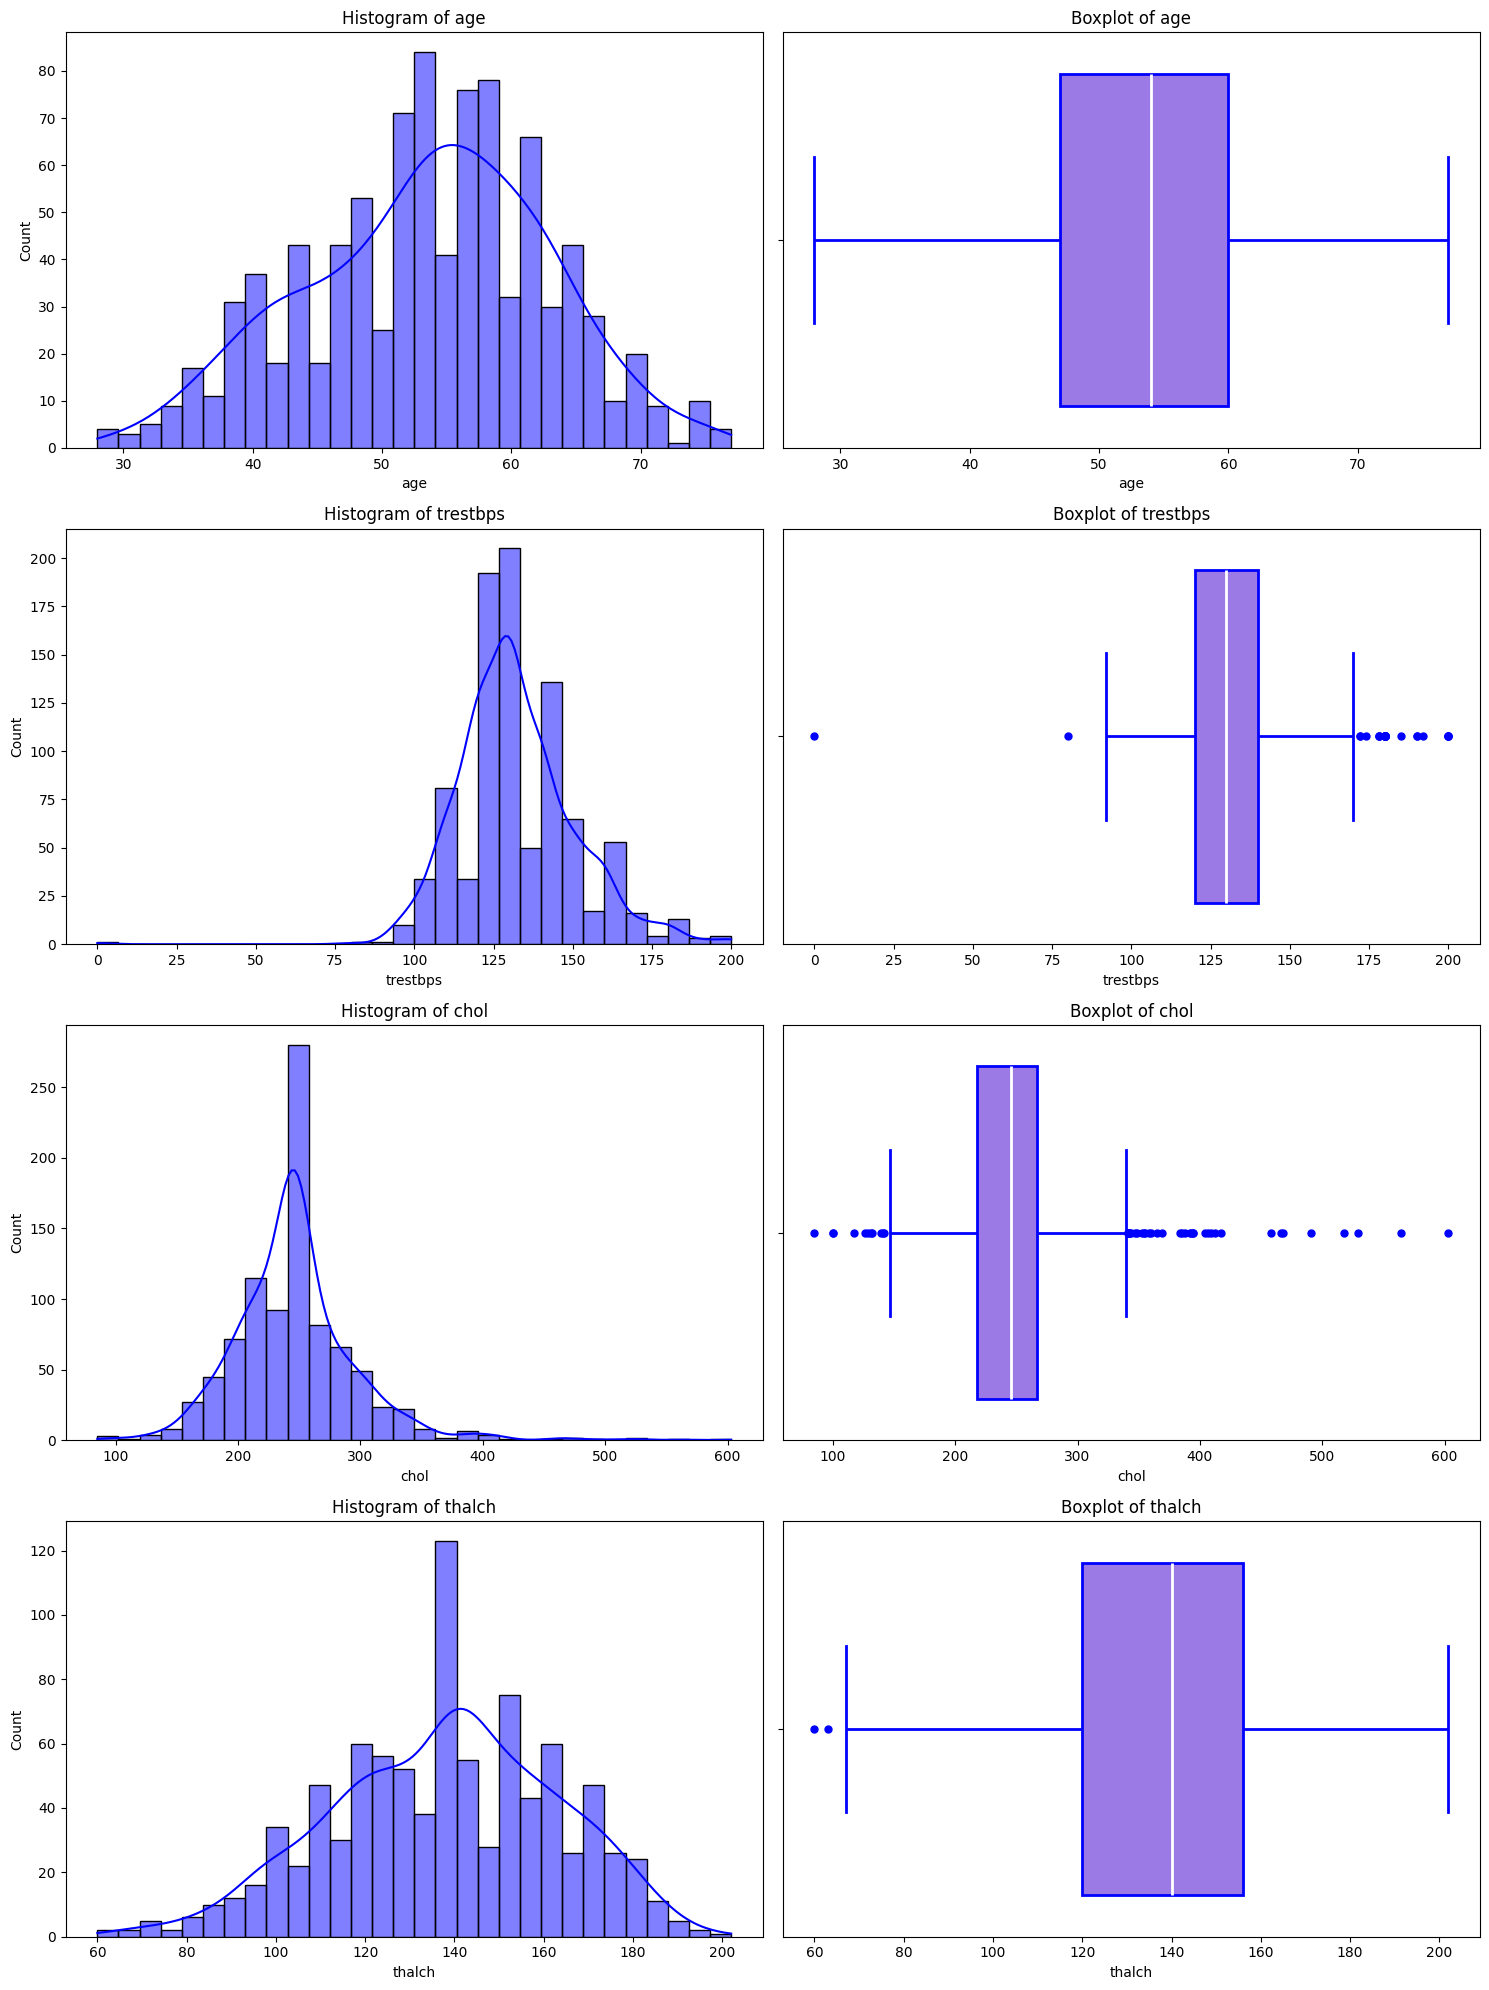

In [ ]:
# Remove id and old peak column from numerical_cols
numerical_cols.remove('id')
numerical_cols.remove('oldpeak')




# Plot histogram and boxplot for numerical columns before scaling
plot_histogram_and_boxplot(df, numerical_cols)

In [ ]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age          0
trestbps    28
chol        47
thalch       2
dtype: int64

In [ ]:
# Get value count for the target variable
df['ca'].value_counts()

ca
0.0    702
1.0    125
2.0     71
3.0     22
Name: count, dtype: int64

In [ ]:
categorical_cols = ['sex','exang','cp','fbs','restecg','slope','thal', "ca", "oldpeak"]
numerical_cols = ["id", "age","trestbps","chol","thalch"]
target_col = ["num"]
print("The categorical cols are : ", categorical_cols)
print("The numerical cols are : ", numerical_cols)
print("The target variable is :  ", target_col)

The categorical cols are :  ['sex', 'exang', 'cp', 'fbs', 'restecg', 'slope', 'thal', 'ca', 'oldpeak']
The numerical cols are :  ['id', 'age', 'trestbps', 'chol', 'thalch']
The target variable is :   ['num']


#Dealing with Outliers




The use of the Interquartile Range (IQR) method for outlier removal is a standard statistical practice aimed at mitigating the impact of extreme values in a dataset, which can distort analyses, especially under the assumption of normal data distribution. This method calculates the IQR as the difference between the 25th (Q1) and 75th (Q3) percentiles of the data, identifying outliers as values outside 1.5 times the IQR from Q1 and Q3.

In the context of heart disease prediction, while the IQR method is applied to clean the data, cholesterol levels ('chol') are deliberately excluded from this outlier removal process. This exception is made due to the clinical importance of cholesterol levels as a significant risk factor for heart disease. Unlike typical outliers, extreme cholesterol values may carry vital information about individual risks for heart disease. Removing these values could eliminate critical data, reducing the predictive model's effectiveness and clinical relevance.

In [ ]:
#from sklearn.base import BaseEstimator, TransformerMixin
#import pandas as pd
#import numpy as np

#class OutlierDetector(BaseEstimator, TransformerMixin):
    #def __init__(self, factor=1.5):
        #self.factor = factor

    #def fit(self, X, y=None):
        # Calculate the bounds for each column
        #self.bounds_ = {}
        #numerical_cols = X.select_dtypes(include=[np.number]).columns  # Only process numeric columns
        #for column in numerical_cols:
            #Q1 = X[column].quantile(0.25)
            #Q3 = X[column].quantile(0.75)
            #IQR = Q3 - Q1
            #self.bounds_[column] = {'lower': Q1 - self.factor * IQR, 'upper': Q3 + self.factor * IQR}
        #return self

    #def transform(self, X):
        #X_filtered = X.copy()
        #numerical_cols = X.select_dtypes(include=[np.number]).columns  # Only process numeric columns
        #for column in numerical_cols:
            #lower_bound = self.bounds_[column]['lower']
            #upper_bound = self.bounds_[column]['upper']
            # Filter rows that are outside the bounds
            #X_filtered = X_filtered[(X_filtered[column] >= lower_bound) & (X_filtered[column] <= upper_bound)]
        #return X_filtered


In [ ]:
def print_heading(text):
    """
    Prints the provided text as a formatted heading.

    Parameters:
        text (str): The text to format and print as a heading.
    """
    print("\n" + "=" * 50)
    print(text.upper())
    print("=" * 50 + "\n")

# Usage example:
print_heading('Dataset shape inspect')



DATASET SHAPE INSPECT



In [ ]:
print_heading('Observations from oldpeak binned')
df['oldpeak'].value_counts()


OBSERVATIONS FROM OLDPEAK BINNED



oldpeak
Mild Depression        728
Moderate Depression    175
No Depression           11
Severe Depression        6
Name: count, dtype: int64

#Transforming the multilabel target variable into a binary classification problem for easy decision making.

Approach: Binary Transformation: A new column 'num_binary' is introduced, assigning '1' for any indication of heart disease (originally represented by 'num' > 0) and '0' for its absence (originally 'num' = 0). This step simplifies the multiple disease stages into a two-category problem, facilitating a focused analysis on the critical binary outcome of heart disease presence or absence by converting it into a binary format, we create a clear dichotomy: (1)'detected' for the presence of heart disease and (0)'not detected' for its absence.

In [ ]:
# Get value count for the target variable
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [ ]:
# Create a new column 'num_binary' in the dataframe 'df'.
# If 'num' is greater than or equal to 2, 'num_binary' is 1, otherwise 0.
df['num_binary'] = df['num'].apply(lambda x:1 if x >= 2 else 0)

# Replace the 'num' column with the 'num_binary' column
df['num'] = df['num_binary']

# Drop the 'num_binary' column as it is no longer needed
df.drop('num_binary', axis=1, inplace=True)

In [ ]:
# Get value count for the target variable
df['num'].value_counts()

num
0    676
1    244
Name: count, dtype: int64

In [ ]:
pip install scikit-learn xgboost catboost lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.1 MB/s eta 0:00:00


In [ ]:
# Importing models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing models from xgboost, catboost, and lightgbm
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB



In [ ]:
categorical_cols = ['sex','exang','cp','fbs','restecg','slope','thal', "ca", "oldpeak"]
numerical_cols = ["id", "age","trestbps","chol","thalch"]

In [ ]:
models = {
  'Logistic Regression': {
    'ID': 'LogisticRegression',
    'model': LogisticRegression(),
    'params': {
        'model__C': [1, 10],
        'model__penalty': ['l2'],
        'model__max_iter': [1000],
    },
},

'Support Vector Machine': {
    'ID': 'SVC',
    'model': SVC(),
    'params': {
        'model__C': [1, 10],
        'model__kernel': ['rbf'],
    },
},
   'AdaBoost Classifier': {
        'ID': 'AdaBoostClassifier',
        'model': AdaBoostClassifier(),
        'params': {
            'model__n_estimators': [10, 100]
        }
    },
  'XGBoost Classifier': {
    'ID': 'XGBClassifier',
    'model': XGBClassifier(),
    'params': {
        'model__max_depth': [3, 4],
        'model__learning_rate': [0.1, 0.2],
        'model__n_estimators': [50, 100],
        'model__gamma': [0, 0.1],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0],
        'model__reg_alpha': [0],
        'model__reg_lambda': [1],
    },
  },
  'Decision Tree Classifier': {
    'ID': 'DecisionTreeClassifier',
    'model': DecisionTreeClassifier(),
    'params': {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 3, 5, 10],
        'model__max_features': [None, 'sqrt', 'log2']
    },
},
'Random Forest Classifier': {
    'ID': 'RandomForestClassifier',
    'model': RandomForestClassifier(),
    'params': {
        'model__n_estimators': [10, 50],
        'model__max_depth': [None, 3, 5],
        'model__min_samples_split': [2, 4],
        'model__min_samples_leaf': [1, 2],
    },
},
  'K-Nearest Neighbors': {
    'ID': 'KNeighborsClassifier',
    'model': KNeighborsClassifier(),
    'params': {
        'model__n_neighbors': [3, 5],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
},
'Gradient Boosting Classifier': {
    'ID': 'GradientBoostingClassifier',
    'model': GradientBoostingClassifier(),
    'params': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.1, 0.2],
        'model__max_depth': [3, 4],
        # 'model__min_samples_split': [2, 4],
        # 'model__min_samples_leaf': [1, 2],
        # 'model__subsample': [0.8, 1.0],
        'model__max_features': ['sqrt', 'log2', None]
    },
},
   'CatBoost Classifier': {
        'ID': 'CatBoostClassifier',
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'model__iterations': [10, 100],
            'model__depth': [1, 2, 3, 4]
        }
    },
    'LGBM Classifier': {
        'ID': 'LGBMClassifier',
        'model': LGBMClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1]
        }
    },
    'GaussianNB': {
        'ID': 'GaussianNB',
        'model': GaussianNB(),
        'params': {}
    },

}

In [ ]:
def calculate_error_ratio(df, target_column, feature_column, test_size=0.2, random_state=42, stratify=None ):

    # Define features and target
    X = df.drop([target_column], axis=1)  # Features
    y = df[target_column]  # Target

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=stratify, test_size=test_size, random_state=random_state)

    # Calculate the percentage representation of feature_column in training and test sets
    train_percentages = X_train[feature_column].value_counts(normalize=True)*100
    test_percentages = X_test[feature_column].value_counts(normalize=True)*100

    # Calculate the error ratio
    error_ratio = abs(train_percentages - test_percentages)

    # Create a dataframe to compare the percentages
    compare_percentages = pd.DataFrame({
            "random_train %": train_percentages,
            "random_test %": test_percentages,
            "error_ratio %": error_ratio
            })

    # Print the representation of feature_column value in training and test sets before stratified sampling
    if stratify is None:
        print_heading(f'Representation of {feature_column} value in x_train and x_test before stratified Sampling'.upper())
    else:
        print_heading(f'Representation of {feature_column} value in x_train and x_test after stratified Sampling'.upper())
    compare_error_df = round(compare_percentages,2)
    return  X_train, X_test, y_train, y_test, compare_error_df

In [ ]:
X_train, X_test, y_train, y_test, compare_error_df = calculate_error_ratio(df, 'num', 'ca')
compare_error_df


REPRESENTATION OF CA VALUE IN X_TRAIN AND X_TEST BEFORE STRATIFIED SAMPLING



,random_train %,random_test %,error_ratio %
ca,,,
0.0,76.09,77.17,1.09
1.0,13.72,13.04,0.68
2.0,7.47,8.70,1.22
3.0,2.72,1.09,1.63


In [ ]:
X_train, X_test, y_train, y_test, compare_error_df = calculate_error_ratio(df, 'num', 'ca', stratify=df['ca'])
compare_error_df


REPRESENTATION OF CA VALUE IN X_TRAIN AND X_TEST AFTER STRATIFIED SAMPLING



,random_train %,random_test %,error_ratio %
ca,,,
0.0,76.36,76.09,0.27
1.0,13.59,13.59,0.00
2.0,7.74,7.61,0.14
3.0,2.31,2.72,0.41


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
%%time
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score

# Define a pipeline for numerical features with a QuantileTransformer
numerical_transformer  = Pipeline(steps=[
  # Apply QuantileTransformer to transform numerical features to a normal distribution
  #('quantile', QuantileTransformer(random_state=42, output_distribution='normal', n_quantiles=476)),
])

# Define a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
  transformers=[
    # Apply numerical_transformer pipeline to numerical columns
    ('num', numerical_transformer, numerical_cols),
    # Apply OneHotEncoder to categorical columns
    ('cat', OneHotEncoder(), categorical_cols)
  ]
)


CPU times: user 65 µs, sys: 13 µs, total: 78 µs
Wall time: 83.7 µs


In [ ]:
# Initialize a list to store model performance metrics
model_scores = []
# Initialize a variable to store the best accuracy found
best_accuracy = 0
# Initialize a variable to store the best estimator
best_estimator = None
# Dictionary to store cross-validation results
cv_res = {}
# Placeholder for numerical columns list
numerical_cols
# Placeholder for the best features selected by SelectKBest
selected_k_best = None

In [ ]:
# Iterate over the models dictionary to train and evaluate each model
for name, model in models.items():
  # Define feature selection step using mutual information criterion
  feature_selection = SelectKBest(mutual_info_classif, k=10)
  # Define the pipeline with preprocessing, feature selection, and the model
  pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('model', model['model'])
  ])

  # Combine model-specific parameters with feature selection parameters
  full_params = model['params']
  full_params.update({
      # Define grid search options for 'k' in feature selection
      'feature_selection__k': [3, 5, 8, 'all']
    })

In [ ]:
categorical_cols = ['sex','exang','cp','fbs','restecg','slope','thal', "ca", "oldpeak"]
numerical_cols = ["id", "age","trestbps","chol","thalch"]

In [ ]:
# Convert 'ca' to string type to treat it as categorical
X_train['ca'] = X_train['ca'].astype(str)

# Select only numeric columns excluding 'ca'
numerical_cols = X_train.select_dtypes(include=[np.number]).columns


In [ ]:
# Select only numeric columns
numerical_cols = X_train.select_dtypes(include=[np.number]).columns

# Check for infinite values in numeric columns only
np.isfinite(X_train[numerical_cols]).all()

id          True
age         True
trestbps    True
chol        True
thalch      True
dtype: bool

In [ ]:
# Splitting data
X = df.drop(['num', 'id', 'dataset'], axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)
print("Columns in X_train:", X_train.columns.tolist())

Numerical columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch'], dtype='object')
Categorical columns: ['sex', 'exang', 'cp', 'fbs', 'restecg', 'slope', 'thal', 'ca', 'oldpeak']
Columns in X_train: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
print(X_train.dtypes)

age            int64
sex           object
cp            object
trestbps     float64
chol           int64
fbs             bool
restecg       object
thalch       float64
exang           bool
oldpeak     category
slope         object
ca           float64
thal          object
dtype: object


In [ ]:
# Convert 'ca' to a categorical type
X_train['ca'] = X_train['ca'].astype('category')

# Check data types again to confirm the change
print(X_train.dtypes)


age            int64
sex           object
cp            object
trestbps     float64
chol           int64
fbs             bool
restecg       object
thalch       float64
exang           bool
oldpeak     category
slope         object
ca          category
thal          object
dtype: object


In [ ]:
# Check if 'id' column exists in X
if 'id' not in X.columns:
    numerical_cols = numerical_cols[numerical_cols != 'id']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Assuming df is your DataFrame and 'num' is the target column
X = df.drop(['num', 'id', 'dataset'],axis=1, errors='ignore')
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

# Models to evaluate
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("SVM", SVC(random_state=42)),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

model_results = []

# Evaluate models using cross-validation and store results
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    accuracy = scores.mean()
    std_dev = scores.std()
    model_results.append((name, accuracy, std_dev))
    print(f"{name} - Accuracy: {accuracy:.4f} (±{std_dev:.4f})")

best_model = max(model_results, key=lambda x: x[1])
print(f"\nBest model: {best_model[0]} - Accuracy: {best_model[1]:.4f} (±{best_model[2]:.4f})")

# Evaluating the best model on the test set
pipeline_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', dict(models)[best_model[0]])])
pipeline_best.fit(X_train, y_train)
y_pred = pipeline_best.predict(X_test)
print("\nEvaluation of the Best Model on the Test Set:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Logistic Regression - Accuracy: 0.8464 (±0.0259)
Random Forest - Accuracy: 0.8383 (±0.0375)
SVM - Accuracy: 0.8383 (±0.0271)
KNN - Accuracy: 0.8016 (±0.0129)
Decision Tree - Accuracy: 0.7799 (±0.0236)
XGBoost - Accuracy: 0.8410 (±0.0378)

Best model: Logistic Regression - Accuracy: 0.8464 (±0.0259)

Evaluation of the Best Model on the Test Set:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       135
           1       0.74      0.53      0.62        49

    accuracy                           0.83       184
   macro avg       0.79      0.73      0.75       184
weighted avg       0.82      0.83      0.82       184

[[126   9]
 [ 23  26]]


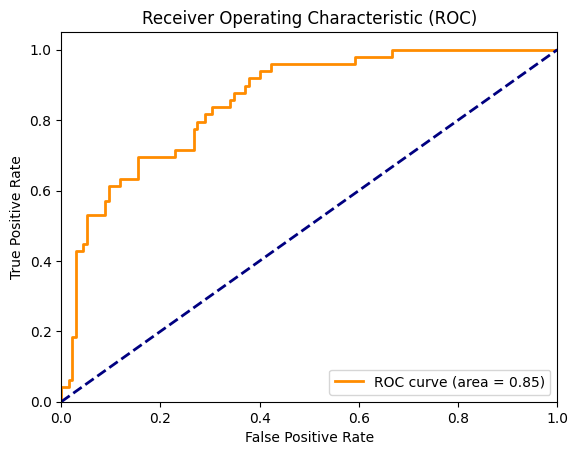

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming the best model is a binary classifier and you're working with binary classification
if hasattr(pipeline_best.named_steps['model'], "predict_proba"):
    y_probs = pipeline_best.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies and standard deviations
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'Decision Tree', 'XGBoost']
accuracies = [0.8464, 0.8383, 0.8383, 0.8016, 0.7799, 0.8410]
std_devs = [0.0259, 0.0375, 0.0271, 0.0129, 0.0236, 0.0378]


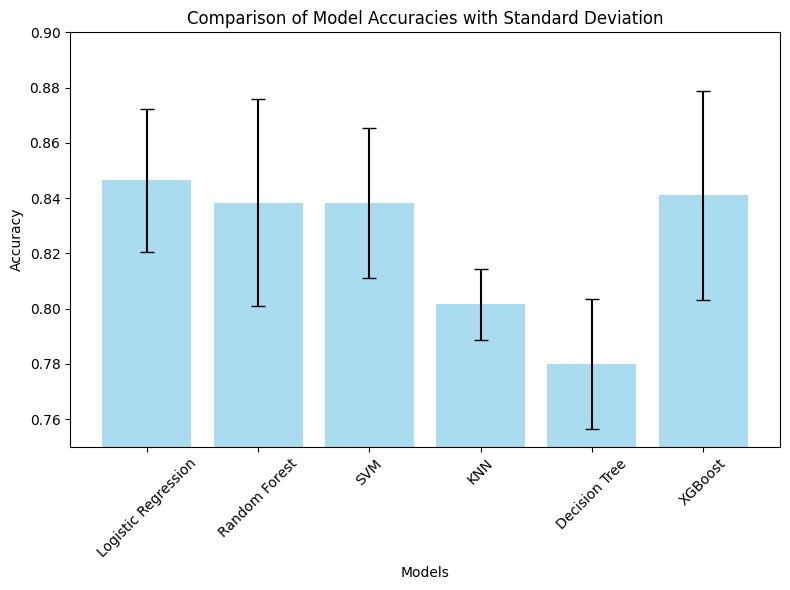

In [ ]:
# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Creating the bar chart
ax.bar(models, accuracies, yerr=std_devs, capsize=5, color='skyblue', alpha=0.7)

# Adding titles and labels
ax.set_title('Comparison of Model Accuracies with Standard Deviation')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_ylim([0.75, 0.9])  # Setting y-axis limits to make deviations clear

# Rotating the model names for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming preprocessor is already defined
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])


In [ ]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']  # 'liblinear' works well with 'l1' and 'l2' penalties
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validation accuracy: 0.8464239749954036


In [ ]:
# Extract the best model from grid_search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Test accuracy: 0.8260869565217391
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       135
           1       0.74      0.53      0.62        49

    accuracy                           0.83       184
   macro avg       0.79      0.73      0.75       184
weighted avg       0.82      0.83      0.82       184

Confusion matrix:
 [[126   9]
 [ 23  26]]


In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.8546195652173914
Test Accuracy: 0.8260869565217391


In [ ]:
# Assuming 'preprocessor' is your preprocessing pipeline as defined earlier
from sklearn.linear_model import LogisticRegression

# Create a new pipeline instance with Logistic Regression as the model
pipeline_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the pipeline to your training data
pipeline_best.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'trestbps', 'chol', 'thalch'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'exang', 'cp', 'fbs',
                                                   'restecg', 'slope', 'thal',
                                                   'ca', 'oldpeak'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = pipeline_best.predict(X_test)

# Evaluate the predictions
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test accuracy: 0.8260869565217391
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       135
           1       0.74      0.53      0.62        49

    accuracy                           0.83       184
   macro avg       0.79      0.73      0.75       184
weighted avg       0.82      0.83      0.82       184

[[126   9]
 [ 23  26]]


In [ ]:
# Assuming 'pipeline_best' contains a Logistic Regression in the last step
# Ensure that your logistic regression model is named 'classifier' in the pipeline
if 'classifier' in pipeline_best.named_steps and hasattr(pipeline_best.named_steps['classifier'], 'coef_'):
    import pandas as pd

    # Get coefficients from the Logistic Regression model
    coefficients = pipeline_best.named_steps['classifier'].coef_[0]

    # Get feature names from the preprocessor if it's a ColumnTransformer
    feature_names = pipeline_best.named_steps['preprocessor'].get_feature_names_out()

    # Create a DataFrame for better visualization
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })

    # Sort the features by the absolute value of their coefficients
    feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

    print(feature_importance)


In [ ]:
new_data = pd.DataFrame({
    'age': [63, 37],
    'sex': ['male', 'female'],
    'cp': ['typical angina', 'non-anginal'],
    'trestbps': [145, 130],
    'chol': [233, 250],
    'fbs': [True, False],
    'restecg': ['normal', 'st-t abnormality'],
    'thalch': [150, 187],
    'exang': [False, True],
    'oldpeak': ['Moderate Depression', 'Mild Depression'],
    'slope': ['upsloping', 'flat'],
    'ca': [0, 2],
    'thal': ['fixed defect', 'reversable defect']
})


In [ ]:
predictions = best_model.predict(new_data)
print(predictions)

[0 1]


In [ ]:
predictions = pipeline_best.predict(new_data)
print(predictions)

[0 1]


In [ ]:
# This will print all steps in the pipeline with their names
print(best_model.named_steps)

{'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['age', 'trestbps', 'chol', 'thalch'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'exang', 'cp', 'fbs', 'restecg',
                                  'slope', 'thal', 'ca', 'oldpeak'])]), 'classifier': LogisticRegression(C=1, random_state=42, solver='liblinear')}


In [ ]:
print(pipeline_best.named_steps)


{'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['age', 'trestbps', 'chol', 'thalch'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'exang', 'cp', 'fbs', 'restecg',
                                  'slope', 'thal', 'ca', 'oldpeak'])]), 'model': LogisticRegression(max_iter=1000, random_state=42)}


In [ ]:
from sklearn.utils.validation import check_is_fitted

# Assuming pipeline_best is your fitted pipeline
try:
    # Check if the model step of the pipeline is fitted
    check_is_fitted(pipeline_best)
    print("The pipeline is properly fitted.")
except NotFittedError as e:
    print("The pipeline is not fitted yet.")


The pipeline is properly fitted.


In [ ]:
from sklearn.utils.validation import check_is_fitted

# Assuming 'model' is the name of the step in the pipeline where the estimator is located
try:
    # Access the model step and check if it's fitted
    check_is_fitted(pipeline_best.named_steps['model'])
    print("The model step is fitted.")
except AttributeError as e:
    print("The model step is not fitted. Error:", e)


The model step is fitted.


In [ ]:
# Print all steps in the pipeline to check their names
for step_name, step_object in pipeline_best.named_steps.items():
    print(f"Step name: {step_name}, Step object: {type(step_object).__name__}")



Step name: preprocessor, Step object: ColumnTransformer
Step name: model, Step object: LogisticRegression


In [ ]:
if X_train is not None and y_train is not None:
    # Fit the pipeline with the training data
    pipeline_best.fit(X_train, y_train)
    print("The pipeline has been successfully fitted.")

The pipeline has been successfully fitted.


In [ ]:
# Access model coefficients and feature names
coefs = pipeline_best.named_steps['model'].coef_[0]
feature_names = pipeline_best.named_steps['preprocessor'].get_feature_names_out()

# Pair feature names with coefficients
feature_importances = zip(feature_names, coefs)
sorted_features = sorted(feature_importances, key=lambda x: abs(x[1]), reverse=True)

# Display the features and their importances
print("Feature importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Feature importances:
cat__ca_0.0: -1.8416054489874902
cat__cp_atypical angina: -1.144301166723561
cat__ca_3.0: 0.8995948466042716
cat__slope_upsloping: -0.7870335545816314
cat__slope_downsloping: 0.7481132747820028
cat__ca_2.0: 0.7285791506823156
cat__oldpeak_No Depression: -0.6800444236074755
cat__oldpeak_Moderate Depression: 0.6143267733993067
cat__thal_normal: -0.594838825516337
cat__cp_asymptomatic: 0.5267783608097373
cat__restecg_st-t abnormality: 0.509337770584742
num__thalch: -0.4866721213158933
cat__restecg_normal: -0.31861506926425764
cat__cp_non-anginal: 0.3140397304100621
cat__thal_reversable defect: 0.3090291965472838
cat__cp_typical angina: 0.30293427914064763
cat__thal_fixed defect: 0.28526083260593993
num__age: 0.2772211384603552
cat__sex_Female: -0.2753445020874545
cat__sex_Male: 0.27479570572434264
cat__ca_1.0: 0.21288265533779163
cat__restecg_lv hypertrophy: -0.19127149768359183
cat__oldpeak_Mild Depression: 0.15208602180090397
cat__oldpeak_Severe Depression: -0.08691

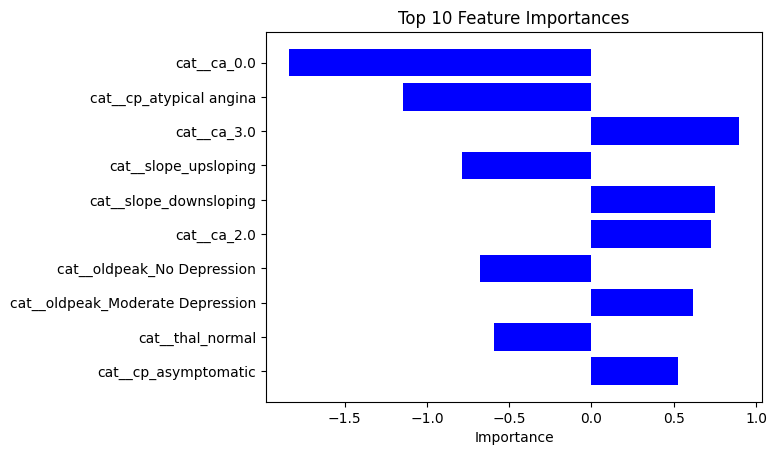

In [ ]:
import matplotlib.pyplot as plt

# Extract values for plotting
features, importances = zip(*sorted_features[:10])  # Limit to top 10 features for clarity

fig, ax = plt.subplots()
ax.barh(features, importances, color='blue')
ax.set_xlabel('Importance')
ax.set_title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [ ]:
pip install joblib


In [ ]:
from joblib import dump

dump(pipeline_best, 'pipeline_best.joblib')

['pipeline_best.joblib']

In [ ]:
from google.colab import files
files.download('pipeline_best.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from joblib import load

# Load the pipeline from file
pipeline = load('pipeline_best.joblib')

In [ ]:
from joblib import load

try:
    pipeline = load('pipeline_best.joblib')
    print("Pipeline loaded successfully.")
    print(pipeline)
except Exception as e:
    print(f"Failed to load pipeline: {e}")


Pipeline loaded successfully.
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'trestbps', 'chol', 'thalch'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'exang', 'cp', 'fbs',
                                                   'restecg', 'slope', 'thal',
                                                   'ca', 'oldpeak'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])


In [ ]:
# Example of making a prediction with new data
sample_data = {
    'age': [67],
    'sex': ['Male'],
    'cp': ['asymptomatic'],
    'trestbps': [160],
    'chol': [286],
    'fbs': ['False'],  # Make sure boolean values are consistent with how they were trained
    'restecg': ['lv hypertrophy'],
    'thalch': [108],
    'exang': ['True'],  # Make sure boolean values are consistent with how they were trained
    'oldpeak': ['Mild Depression'],
    'slope': ['flat'],
    'ca': [3],
    'thal': ['fixed defect']
}

sample_df = pd.DataFrame(sample_data)

# Predict on the new data
prediction = pipeline.predict(sample_df)
print("Prediction for new sample:", prediction)


Prediction for new sample: [1]


from joblib import dump

# Assuming 'model_pipeline' is your trained model pipeline
dump(best_model_pipeline, 'best_model_pipeline.joblib')


In [ ]:
from google.colab import files

# Correct file path
file_path = 'best_model_pipeline.joblib'

files.download(file_path)
